In [1]:
%pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.9 MB/s eta 0:00:00


In [2]:
import pickle
import numpy as np
import pandas as pd
import json

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K
import seaborn as sns


import matplotlib.pyplot as plt

In [3]:
try:
  from google.colab import drive
  import os

  drive.mount('/content/drive/')
  os.chdir('/content/drive/MyDrive/AGH/MIO')
except:
  pass

Mounted at /content/drive/


# Load data

In [4]:
with open("data/X_train.pkl", "rb") as X_train_file, open(
    "data/X_test.pkl", "rb"
) as X_test_file, open("data/Y_train.pkl", "rb") as Y_train_file, open(
    "data/Y_test.pkl", "rb"
) as Y_test_file, open(
    "data/vocabulary.json", "rt"
) as vocabulary_file, open(
    "models/trump_tweets_model_v2.pkl", "rb"
) as model_file:
    X_test = pickle.load(X_test_file)
    X_train = pickle.load(X_train_file)
    Y_train = pickle.load(Y_train_file)
    Y_test = pickle.load(Y_test_file)
    vocabulary = json.load(vocabulary_file)
    model = pickle.load(model_file)

In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (32897, 5000)
X_test shape: (8225, 5000)
Y_train shape: (32897, 3)
Y_test shape: (8225, 3)


In [6]:
def from_categorical(matrix):
    return np.argmax(matrix, axis=1)

In [8]:
features_names = list(vocabulary.keys())[:5000]
print(f"Number of features: {len(features_names)}")

Number of features: 5000


In [41]:
SHAP_NUM_OF_TWEETS = 100
TWEET_INDEX = 48

In [25]:
import shap

In [26]:
kernel_explainer = shap.KernelExplainer(model, shap.sample(X_train, SHAP_NUM_OF_TWEETS))
kernel_shap_values = np.array(kernel_explainer.shap_values(shap.sample(X_train, SHAP_NUM_OF_TWEETS), max_evals=2*5000+1))

  0%|          | 0/100 [00:00<?, ?it/s]

In [54]:
import pickle

with open("models/kernel_shap_values.pkl", "wb") as shap_values_file:
    pickle.dump(kernel_shap_values, shap_values_file)

In [42]:
print(f"kernel_shap_values shape: {kernel_shap_values.shape}")
print(f"shap_values shape: {shap_values.shape}")

kernel_shap_values shape: (3, 100, 5000)
shap_values shape: (10, 5000, 3)


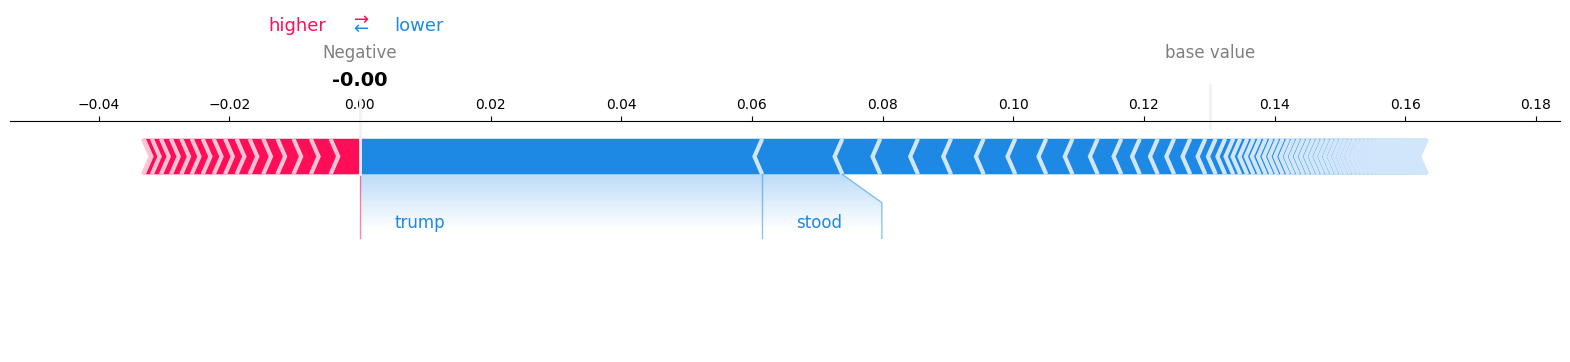

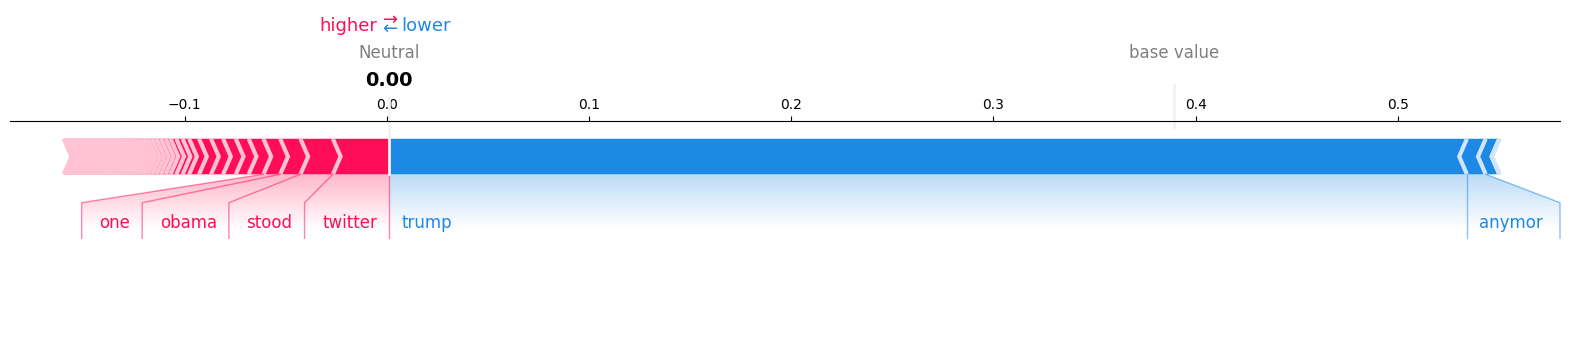

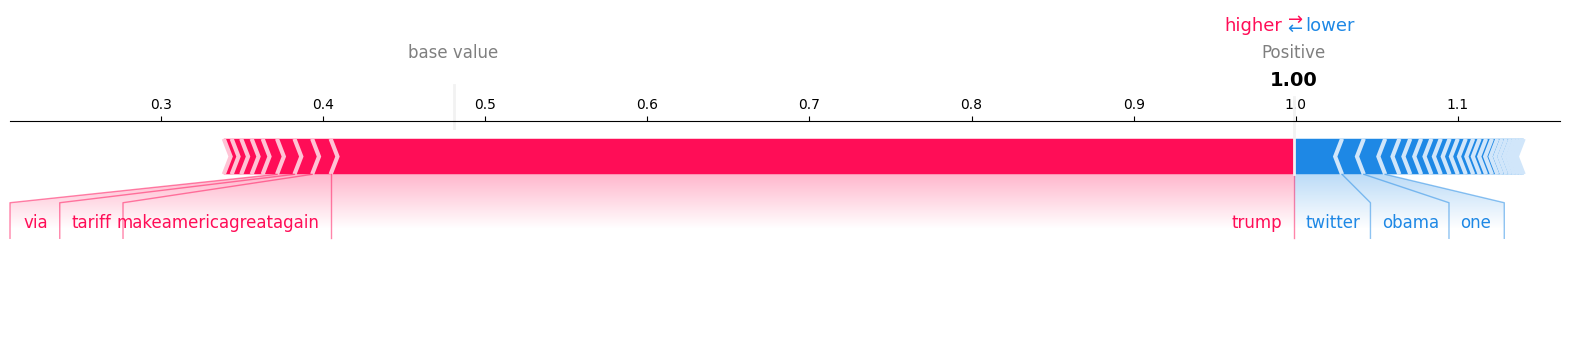

In [43]:
for i in range(3):
    sample_v = kernel_shap_values[i][TWEET_INDEX]
    shap.force_plot(
        kernel_explainer.expected_value[i],
        sample_v,
        features=features_names,
        out_names=["Negative", "Neutral", "Positive"][i],
        matplotlib=True,
    )

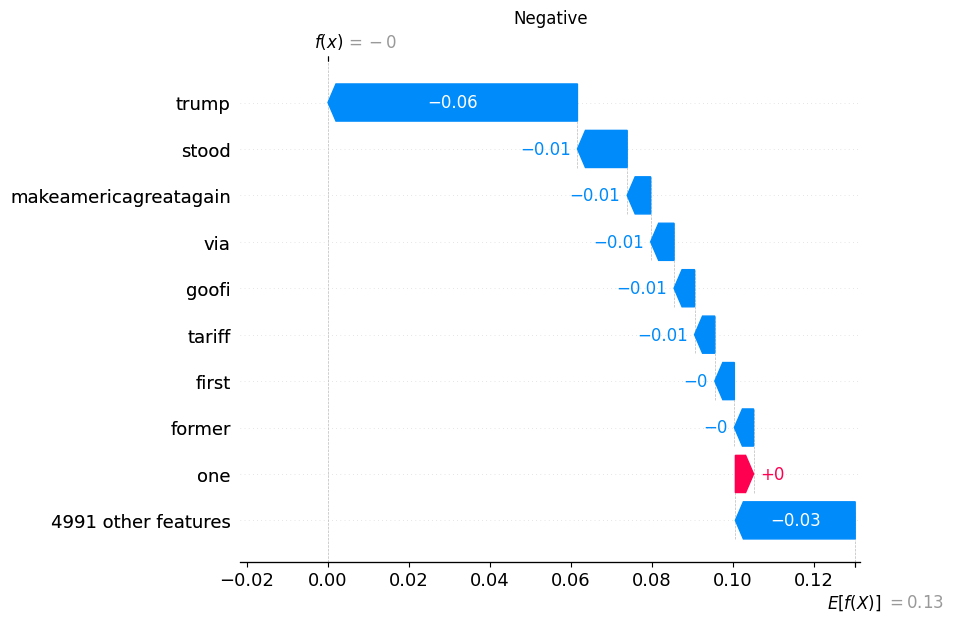

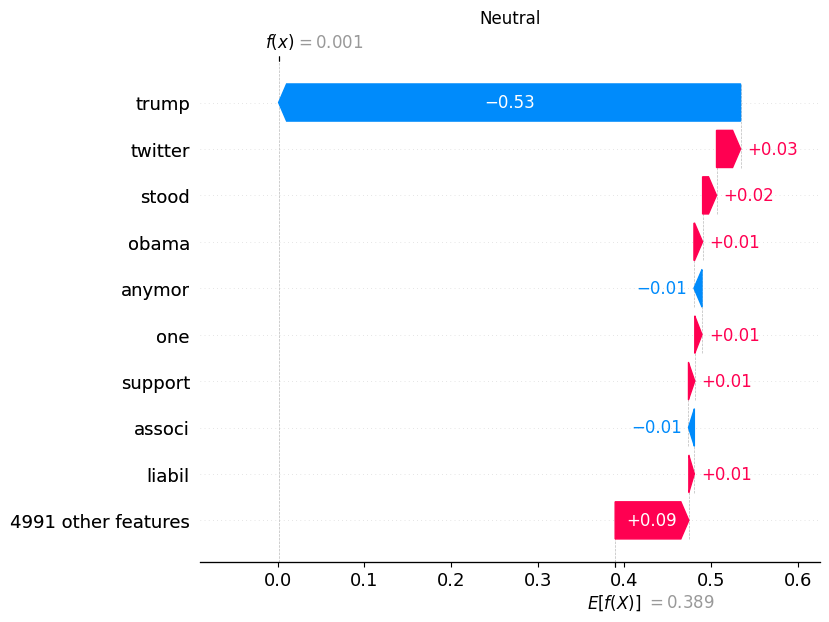

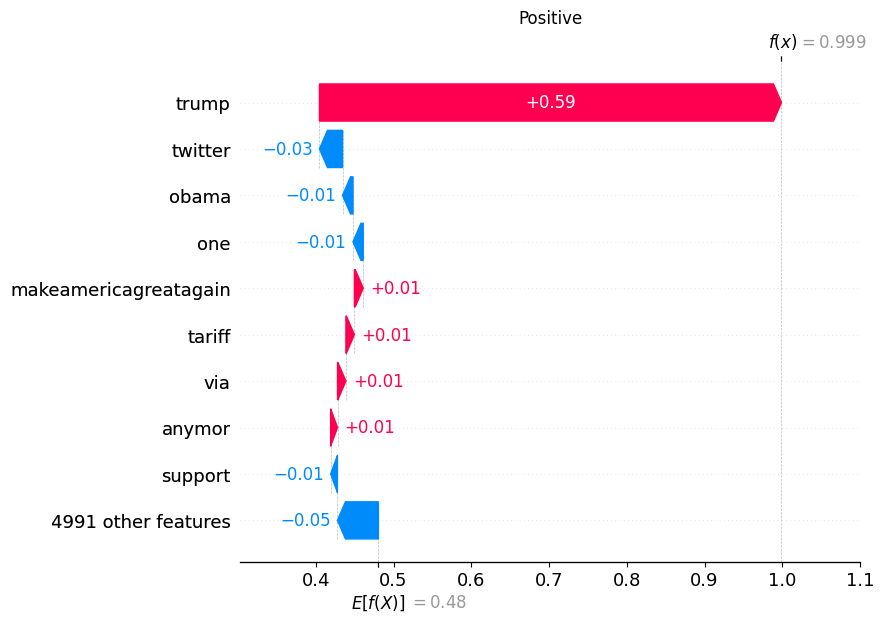

In [44]:
import shap_fixes

for i in range(3):
    plt.title(["Negative", "Neutral", "Positive"][i])
    shap_fixes.waterfall_legacy(
        kernel_explainer.expected_value[i], kernel_shap_values[i][TWEET_INDEX], feature_names=features_names
    )

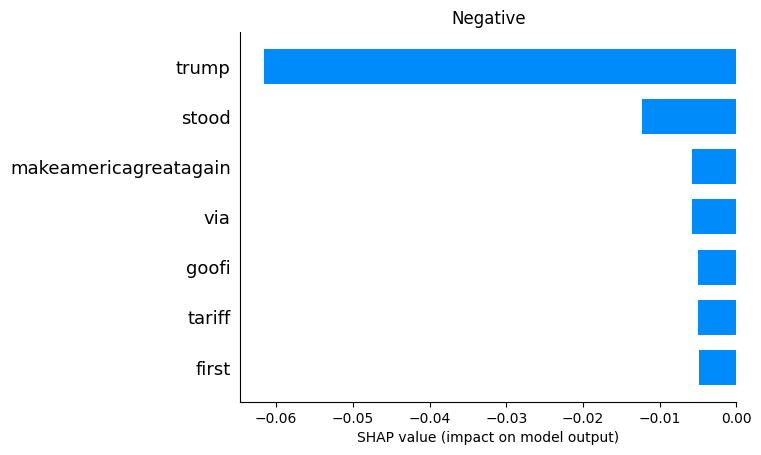

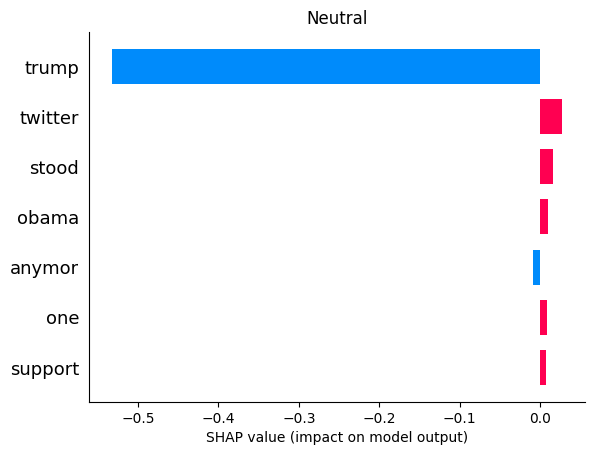

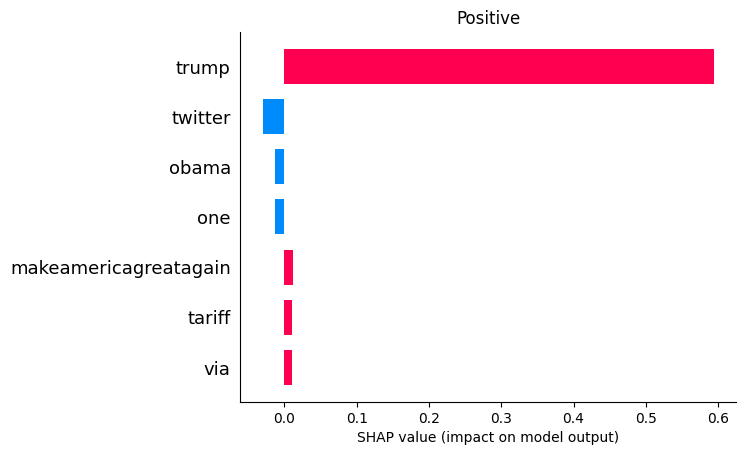

In [45]:
for i in range(3):
    plt.title(["Negative", "Neutral", "Positive"][i])
    shap.bar_plot(kernel_shap_values[i][TWEET_INDEX], feature_names=features_names)

In [46]:
shap.initjs()
shap.force_plot(
    kernel_explainer.expected_value[0],
    kernel_shap_values[0],
    features=features_names
)

Output hidden; open in https://colab.research.google.com to view.

In [47]:
shap.initjs()
shap.force_plot(
    kernel_explainer.expected_value[1],
    kernel_shap_values[1],
    features=features_names
)

Output hidden; open in https://colab.research.google.com to view.

In [48]:
shap.initjs()
shap.force_plot(
    kernel_explainer.expected_value[2],
    kernel_shap_values[2],
    features=features_names
)

Output hidden; open in https://colab.research.google.com to view.

not enough data in bin #1 for feature talk, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #1 for feature review, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #1 for feature york, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #1 for feature first, so it'll be ignored. Try increasing the number of records to plot.


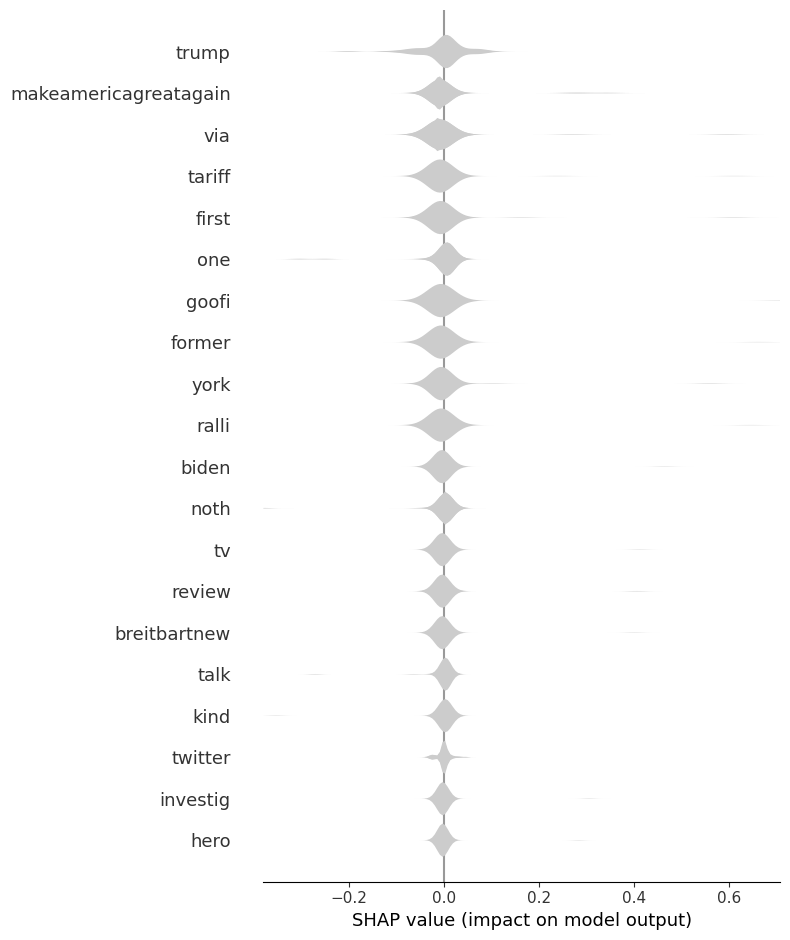

In [49]:
shap.summary_plot(kernel_shap_values[0], X_train[:SHAP_NUM_OF_TWEETS],  feature_names=features_names, plot_type='layered_violin', class_names=["Negative", "Neutral", "Positive"],  color='#cccccc')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


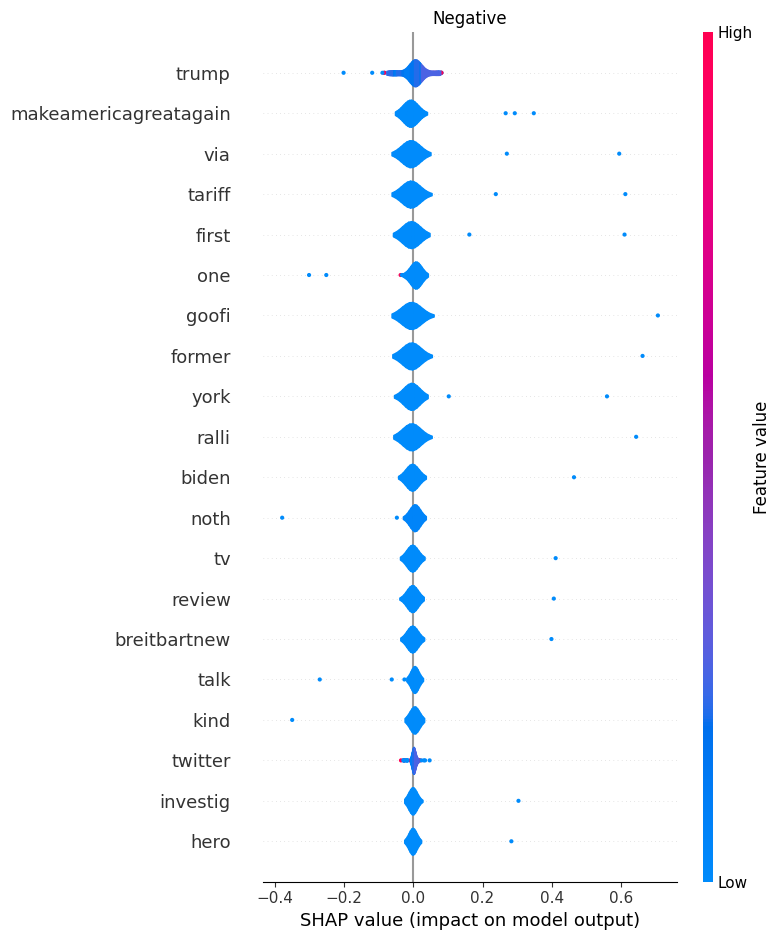

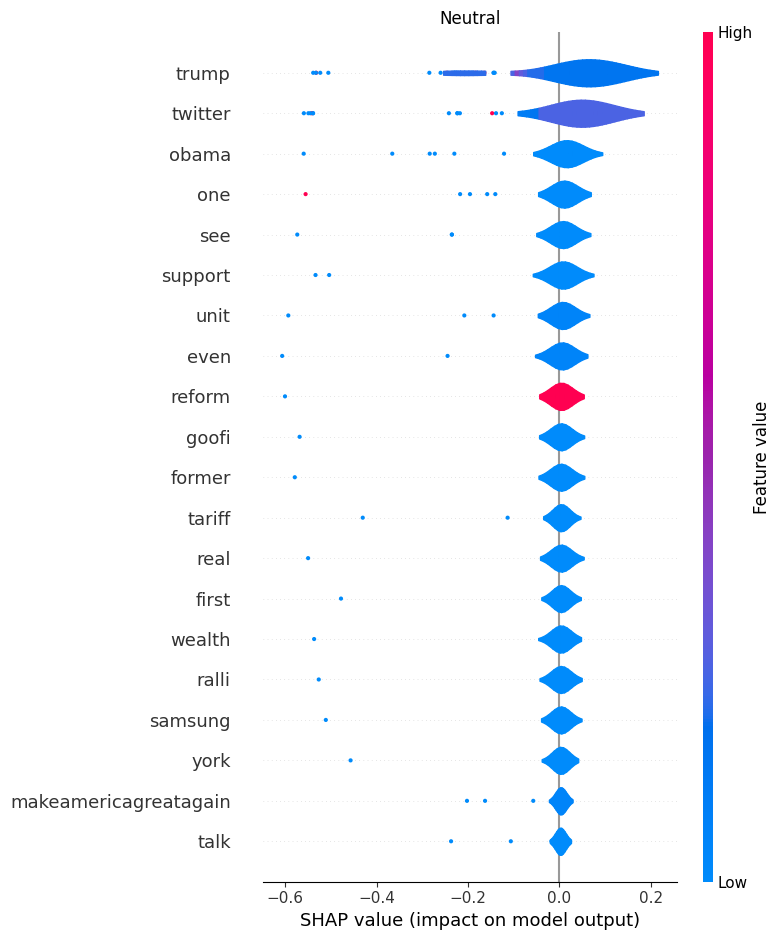

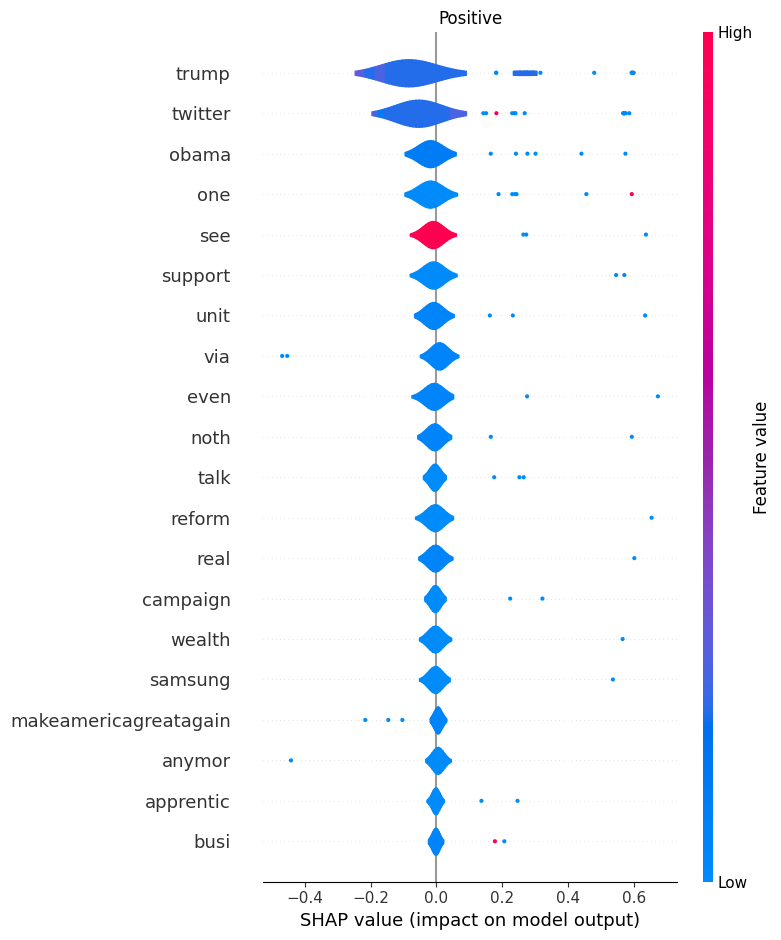

In [50]:
for i in range(3):
    plt.title(["Negative", "Neutral", "Positive"][i])
    shap.summary_plot(kernel_shap_values[i], X_train[:SHAP_NUM_OF_TWEETS],  feature_names=features_names, plot_type='violin')


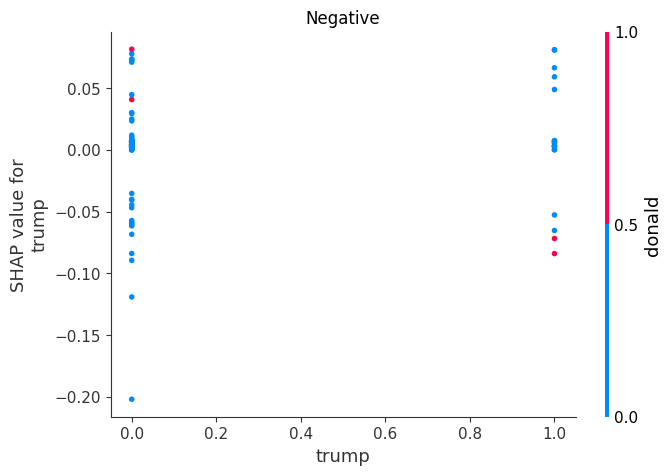

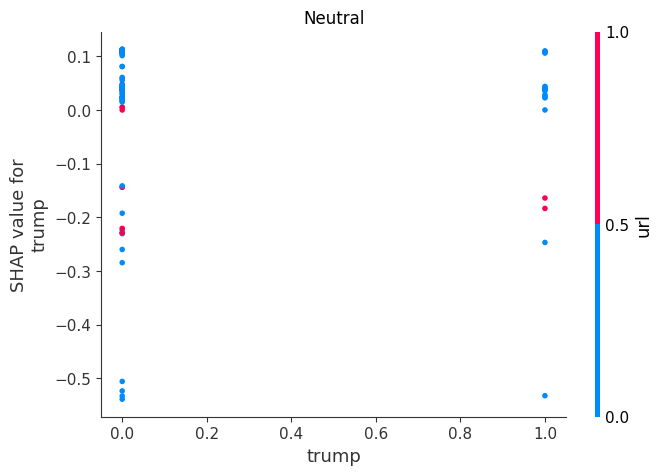

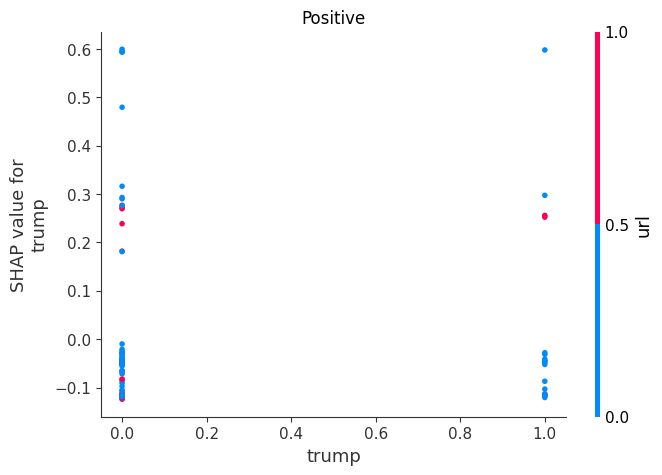

In [51]:
for i in range(3):
    shap.dependence_plot(
        "trump",
        kernel_shap_values[i],
        X_train[:SHAP_NUM_OF_TWEETS],
        feature_names=features_names,
        show=False,
    )
    plt.title(["Negative", "Neutral", "Positive"][i])
    plt.show()

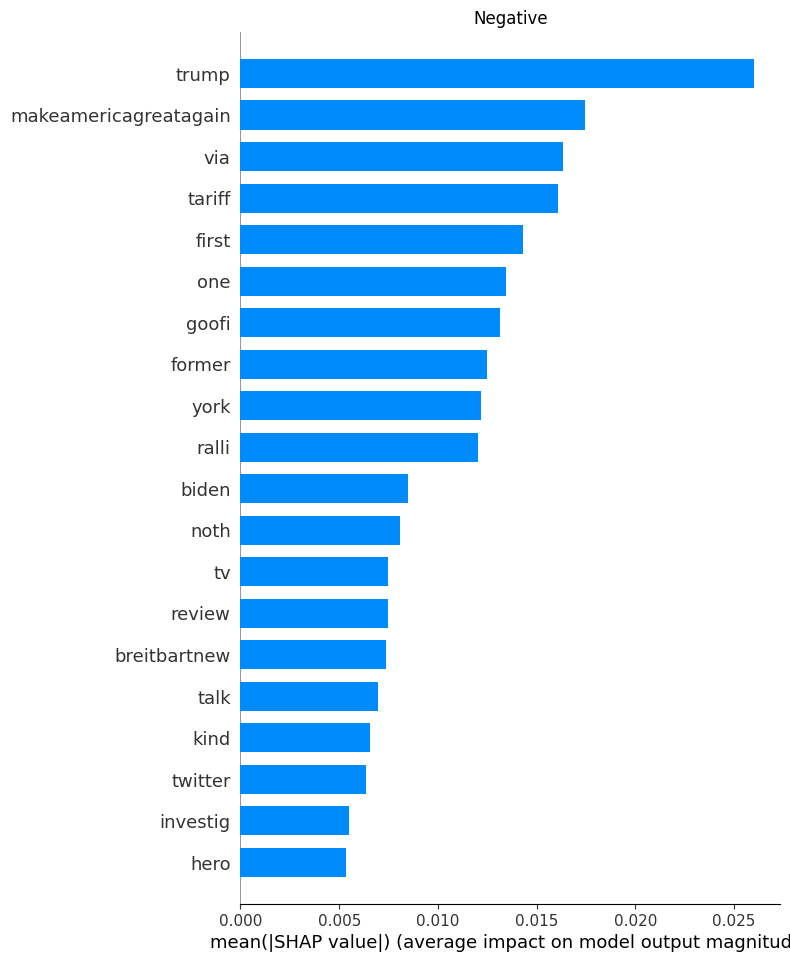

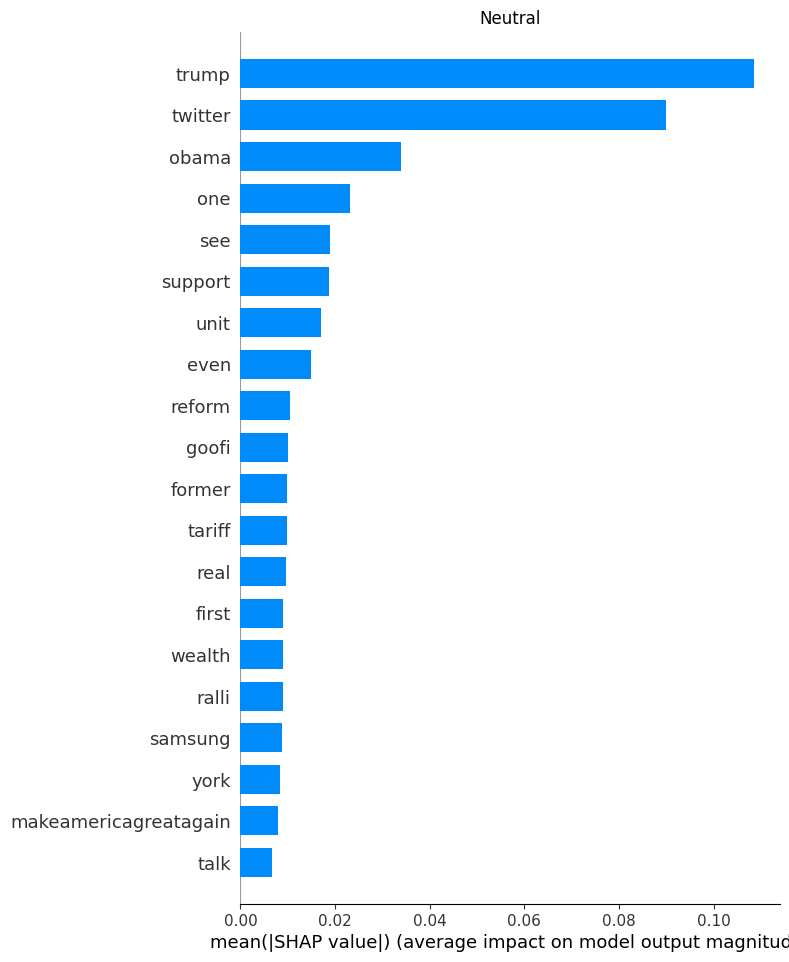

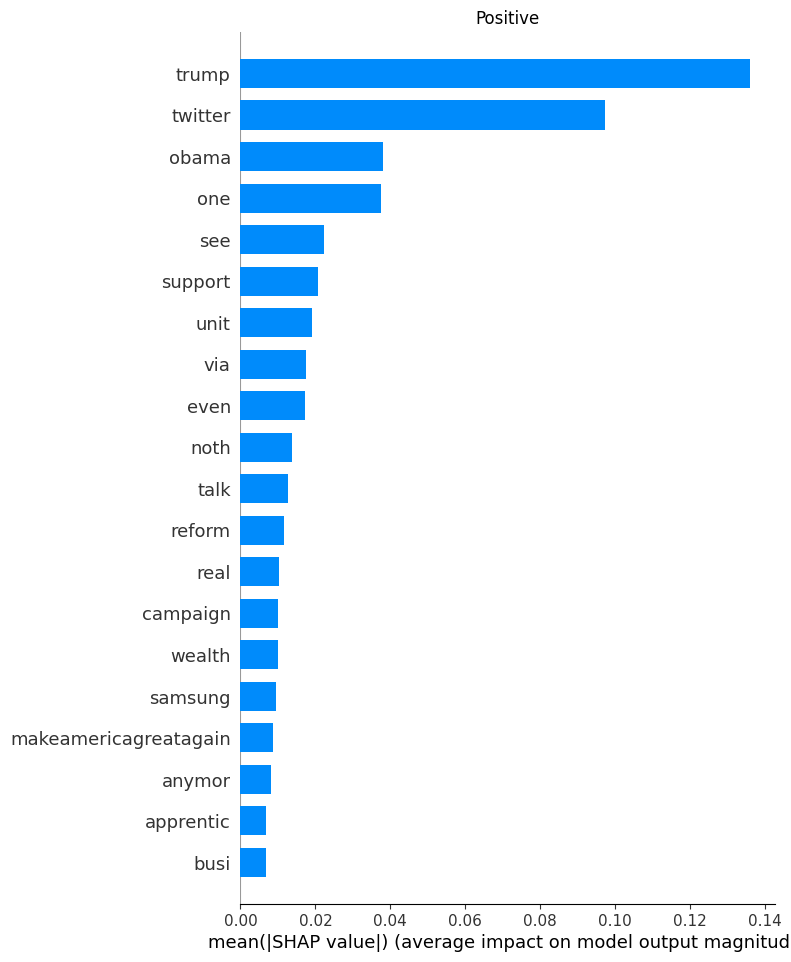

In [52]:
for i in range(3):
    shap.summary_plot(
        kernel_shap_values[i],
        features_names,
        plot_type="bar",
        class_names=["Negative", "Neutral", "Positive"],
        show=False,
    )
    plt.title(["Negative", "Neutral", "Positive"][i])
    plt.show()